### 공부 시간에 따른 점수 예측하기
- 목표 : 공부시간으로 점수를 예측
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부시간
- 타켓/라벨 : 점수
- 학습방법 : 지도학습 > 회귀 
- 알고리즘 : 선형회귀 <== [조건] 데이터분포가 선형분포여야함!

[1] 데이터 준비

In [198]:
hour=range(1,29,2)
jumsu=range(7,100,7)
#jumsu=[1,6,10,14,17,20,19,34,46,65,74,78,80,83]



In [199]:
# List=> DataFrame으로 변환
import pandas as pd

hourDF=pd.DataFrame(hour,columns=['Hour'])
jumsuSR=pd.Series(jumsu)

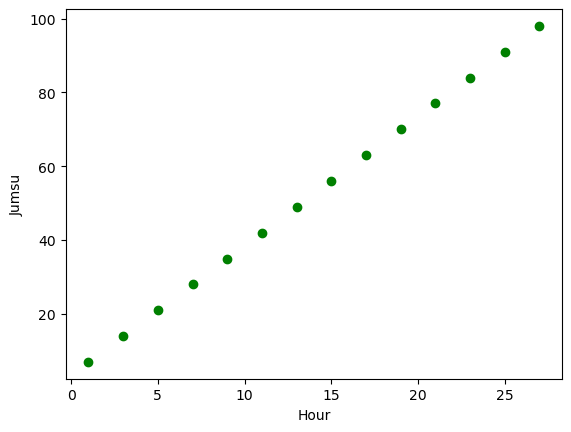

In [200]:
### 현재데이터의 분포 확인
import matplotlib.pyplot as plt

plt.plot(hourDF,jumsuSR,'go')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

[2] 모델 생성 및 학습 진행

In [201]:
# 모듈로딩
from sklearn.linear_model import LinearRegression

In [202]:
# 학습모델 인스턴스생성
model=LinearRegression()

In [203]:
# 학습진행 => 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(hourDF,jumsuSR)

LinearRegression()

In [204]:
# 학습 후 모델 파라미터
print(f'기울기 {model.coef_}, y절편 : {model.intercept_}')

기울기 [3.5], y절편 : 3.500000000000014


In [205]:
# y=ax+b
pre_jumsu=model.coef_[0]*hourDF +model.intercept_
pre_jumsu.values.reshape(-1)-jumsuSR.to_numpy()

array([ 1.33226763e-14,  1.06581410e-14,  1.06581410e-14,  7.10542736e-15,
        7.10542736e-15,  7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.42108547e-14, -1.42108547e-14])

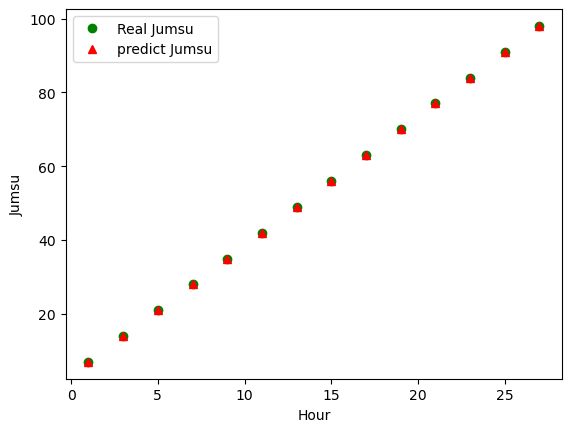

In [206]:
### 예측데이터의 분포 확인
import matplotlib.pyplot as plt

plt.plot(hourDF,jumsuSR,'go',label='Real Jumsu')
plt.plot(hourDF,pre_jumsu,'r^',label='predict Jumsu')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.legend()
plt.show()


[3] 모델 성능 평가

In [207]:
model.score(hourDF,jumsuSR)

1.0

In [208]:
### 오차계산 즉, 손실/비용 함수 확인
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
## root_mean_squred_error 버전 1.4이상

In [209]:
pre_y=model.predict(hourDF)
mse=mean_squared_error(jumsuSR,pre_y)
rmse=mean_squared_error(jumsuSR,pre_y,squared=False)
mae=mean_absolute_error(jumsuSR,pre_y)
r2=r2_score(jumsuSR,pre_y)

In [210]:
print(f'mse :{mse}, rmse : {rmse}, mae : {mae}') # 0 에가까울수록 좋은 모델
print(f' r2 : {r2}')   # 1에 가까울수록 좋은 모델
## r2 = score

mse :6.857455154671224e-29, rmse : 8.280975277508818e-15, mae : 6.026924990822278e-15
 r2 : 1.0
